In [1]:
import pandas as pd 
pd.options.display.max_columns = 999

In [2]:
# load in all CRyPTIC tables
DST_MEASUREMENTS = pd.read_csv('tables/DST_MEASUREMENTS-INH.csv.gz')
DST_SAMPLES = pd.read_pickle('tables/DST_SAMPLES.pkl.gz')
GENOMES = pd.read_pickle('tables/GENOMES.pkl.gz')
MUTATIONS = pd.read_csv('tables/MUTATIONS-katG.csv.gz')
OTHER_PHENOTYPES = pd.read_csv('tables/OTHER_PHENOTYPES-INH.csv.gz')
PHENOTYPES = pd.read_csv('tables/PHENOTYPES.csv.gz')
VARIANTS = pd.read_csv('tables/VARIANTS-katG.csv.gz')

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
DST_MEASUREMENTS.set_index('UNIQUEID', inplace = True)
DST_MEASUREMENTS.drop(DST_MEASUREMENTS.columns[0], axis=1, inplace = True)
#DST_SAMPLES.set_index('UNIQUEID', inplace = True)
    #UNIQUEID IS ALREADY INDEX IN FILE 
#GENOMES.set_index('UNIQUEID', inplace = True)
    #UNIQUEID IS ALREADY INDEX IN FILE
MUTATIONS=MUTATIONS[(~MUTATIONS.IS_NULL) & (MUTATIONS.IS_FILTER_PASS) & (~MUTATIONS.IS_HET) & (MUTATIONS.IS_SNP) \
                    & (MUTATIONS.IN_CDS) & (MUTATIONS.MUTATION != 'R463L') & (MUTATIONS.IS_NONSYNONYMOUS) \
& (MUTATIONS.GENE == 'katG')]
MUTATIONS.set_index('UNIQUEID', inplace = True)
OTHER_PHENOTYPES.set_index('UNIQUEID', inplace = True)
PHENOTYPES.set_index('UNIQUEID', inplace = True)
VARIANTS=VARIANTS[(~VARIANTS.IS_NULL) & (VARIANTS.IS_FILTER_PASS) & (~VARIANTS.IS_HET)]
VARIANTS.set_index('UNIQUEID', inplace = True)

In [4]:
DST_MEASUREMENTS

,index,DRUG,SOURCE,METHOD_1,METHOD_2,METHOD_3,METHOD_CC,METHOD_MIC,PHENOTYPE,SUBJID
UNIQUEID,,,,,,,,,,
site.08.subj.02TB2317.lab.26597.iso.1,35371,INH,CRyPTIC,liquid media,microdilution plate,UKMYC5,0.1,0.2,I,02TB2317
site.05.subj.PMK-0936.lab.MK-0386.iso.1,35372,INH,CRyPTIC,liquid media,microdilution plate,UKMYC5,0.1,1.6,R,PMK-0936
site.08.subj.05TB41001.lab.1759.iso.1,35373,INH,CRyPTIC,liquid media,microdilution plate,UKMYC5,0.1,<=0.025,S,05TB41001
site.06.subj.06TB_0216.lab.06MIL0677.iso.1,35374,INH,CRyPTIC,liquid media,microdilution plate,UKMYC5,0.1,<=0.025,S,06TB_0216
site.02.subj.0713.lab.2014241122.iso.1,35375,INH,CRyPTIC,liquid media,microdilution plate,UKMYC5,0.1,<=0.025,S,0713
...,...,...,...,...,...,...,...,...,...,...
site.04.subj.02309.lab.807314.iso.1,476303,INH,MUMBAI2018,liquid media,MGIT,MGIT960,NaN,NaN,R,02309
site.04.subj.02311.lab.803284.iso.1,476305,INH,MUMBAI2018,liquid media,MGIT,MGIT960,NaN,NaN,R,02311
site.04.subj.02319.lab.807655.iso.1,476307,INH,MUMBAI2018,liquid media,MGIT,MGIT960,NaN,NaN,R,02319


In [5]:
DST_SAMPLES

,SOURCE,COUNTRY_CODE,NUMBER_DST,OTHER_METADATA_JSON,MYKROBE_LINEAGE_NAME_1,MYKROBE_LINEAGE_NAME_2
UNIQUEID,,,,,,
site.ENA.subj.SAMN08295251.lab.1.iso.1,WHO2019,BGD,7,"{""RESEARCH_OUTPUT"": ""doi:10.1016/S1473-3099(18...",Lineage 1,lineage1.1.3
site.ENA.subj.SAMN08295252.lab.1.iso.1,WHO2019,BGD,7,"{""RESEARCH_OUTPUT"": ""doi:10.1016/S1473-3099(18...",Lineage 4,lineage4.1.1.3
site.ENA.subj.SAMN08295253.lab.1.iso.1,WHO2019,BGD,4,"{""RESEARCH_OUTPUT"": ""doi:10.1016/S1473-3099(18...",Lineage 1,lineage1.2.2
site.ENA.subj.SAMN08295254.lab.1.iso.1,WHO2019,BGD,8,"{""RESEARCH_OUTPUT"": ""doi:10.1016/S1473-3099(18...",Lineage 1,lineage1.1.2
site.ENA.subj.SAMN08295255.lab.1.iso.1,WHO2019,BGD,8,"{""RESEARCH_OUTPUT"": ""doi:10.1016/S1473-3099(18...",Lineage 3,lineage3
...,...,...,...,...,...,...
site.06.subj.06TB_1330.lab.06MIL2601.iso.1,SEQTREAT2020,ITA,12,"{'MORE_DATA_IN_CRYPTIC_TABLES': True, 'PLATEDE...",NaN,NaN
site.06.subj.06TB_1331.lab.06MIL2602.iso.1,SEQTREAT2020,ITA,13,"{'MORE_DATA_IN_CRYPTIC_TABLES': True, 'PLATEDE...",NaN,NaN
site.06.subj.06TB_1332.lab.06MIL2603.iso.1,SEQTREAT2020,ITA,14,"{'MORE_DATA_IN_CRYPTIC_TABLES': True, 'PLATEDE...",NaN,NaN


In [6]:
GENOMES

,SITEID,SUBJID,LABID,ISOLATENO,SEQREPS,BELONGS_GPI,PER_SAMPLE_VCF_PRESENT,REGENOTYPED_VCF_PRESENT,CLOCKWORK_VERSION,TBI_INDEX,KMER_COUNTS,SNP_DISTANCE_TO_H37rV,SPECIES,LINEAGE_NAME,SUBLINEAGE_NAME,LINEAGE_PERCENTAGE,N_NULL,N_SNP,N_INDEL,N_FILTER_FAIL,N_REF,N_HET,CATALOGUE_NAME,CATALOGUE_VERSION,TB_TYPE_1,WGS_PREDICTION_STRING,IMAGE_MD5SUM,FTP_PATH,FTP_FILENAME_VCF,TREE_PATH,TREE_FILENAME_VCF,FASTQ_MD5SUMS,SEQTREAT_SAMPLE,MYKROBE_LINEAGE_NAME_1,MYKROBE_LINEAGE_NAME_2,ENA
UNIQUEID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
site.02.subj.0958.lab.22A197.iso.1,02,0958,22A197,1,197,True,True,True,0.8.3,True,False,1154.0,M. tuberculosis,Lineage 2,,71.283784,4934,0,1154,104,0,14329,CRyPTIC,v1.31,MDR,RRURRRSSSSSSSSS,{'02-0958-22A197-1-14': 'a587bac9ad2a0ebd36274...,/well/bag/jeffk/release_staging/,00/01/41/00/14100/site.02.iso.1.subject.0958.l...,dat/CRyPTIC2/V2/02/0958/22A197/1/regenotyped/,site.02.subj.0958.lab.22A197.iso.1.v0.8.3.rege...,,False,Lineage 2,lineage2.2.1,ERS5301054
site.02.subj.0823.lab.2013241494.iso.1,02,0823,2013241494,1,241494,True,True,True,0.8.3,True,False,388.0,M. tuberculosis,Lineage 4,,95.705521,2250,0,388,43,0,9442,CRyPTIC,v1.31,UNK,UUSUSSSSSSSSSSS,{'02-0823-2013241494-1-14': '698507bed7ff19268...,/well/bag/jeffk/release_staging/,00/01/41/43/14143/site.02.iso.1.subject.0823.l...,dat/CRyPTIC2/V2/02/0823/2013241494/1/regenotyped/,site.02.subj.0823.lab.2013241494.iso.1.v0.8.3....,,False,Lineage 2,lineage2.2.3,ERS5301097
site.02.subj.0359.lab.222018-14.iso.1,02,0359,222018-14,1,14222018,True,True,True,0.8.3,True,False,1147.0,M. tuberculosis,Lineage 2,,95.608108,3578,0,1147,118,0,13038,CRyPTIC,v1.31,UNK,SUSSSSSSUSSSSSS,{'02-0359-222018-14-1-14': '39c28529c7564ce379...,/well/bag/jeffk/release_staging/,00/01/08/73/10873/site.02.iso.1.subject.0359.l...,dat/CRyPTIC2/V2/02/0359/222018-14/1/regenotyped/,site.02.subj.0359.lab.222018-14.iso.1.v0.8.3.r...,,False,Lineage 2,lineage2.2.3,ERS5298526
site.02.subj.0224.lab.2013221088.iso.1,02,0224,2013221088,1,13221088_2013221088,True,True,True,0.8.3,True,False,1193.0,M. tuberculosis,Lineage 2,,96.621622,3529,0,1193,104,0,13201,CRyPTIC,v1.31,SUS,SSSSSSSSSSSSSSS,,/well/bag/jeffk/release_staging/,00/01/13/37/11337/site.02.iso.1.subject.0224.l...,dat/CRyPTIC2/V2/02/0224/2013221088/1/regenotyped/,site.02.subj.0224.lab.2013221088.iso.1.v0.8.3....,,False,Lineage 2,lineage2.2.5,ERS5300527
site.02.subj.0918.lab.22A153.iso.1,02,0918,22A153,1,153,True,True,True,0.8.3,True,False,1163.0,M. tuberculosis,Lineage 2,,96.283784,4736,0,1163,121,0,13970,CRyPTIC,v1.31,MDR,RRRRSSUSUSSSSSS,{'02-0918-22A153-1-14': 'b48e27b23f8377c209854...,/well/bag/jeffk/release_staging/,00/01/40/62/14062/site.02.iso.1.subject.0918.l...,dat/CRyPTIC2/V2/02/0918/22A153/1/regenotyped/,site.02.subj.0918.lab.22A153.iso.1.v0.8.3.rege...,,False,Lineage 2,lineage2.2.3,ERS5301016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
site.10.subj.YA00023171.lab.YA00023171.iso.1,10,YA00023171,YA00023171,1,1,True,True,True,0.8.3,True,False,693.0,M. tuberculosis,Lineage 4,LAM,100.000000,5911,0,693,55,0,11874,CRyPTIC,v1.31,SUS,SSSSSSUSSSSSSSS,{'10-YA00023171-YA00023171-1-7': 'da79aa0564b0...,/well/bag/jeffk/release_staging/,00/00/31/24/3124/site.10.iso.1.subject.YA00023...,dat/CRyPTIC2/V2/10/YA00023171/YA00023171/1/reg...,site.10.subj.YA00023171.lab.YA00023171.iso.1.v...,,False,Lineage 4,lineage4.3.2.1,ERS5298216
site.10.subj.SADH00634109_S16.lab.DH00634109_S16.iso.1,10,SADH00634109_S16,DH00634109_S16,1,1,False,True,False,0.8.3,True,True,NaN,,,,NaN,317,0,700,63,0,32,CRyPTIC,v1.31,SUS,SSSSSSSSSSSSSSS,,/well/bag/jeffk/release_staging/,00/00/81/50/8150/site.10.iso.1.subject.SADH006...,dat/CRyPTIC2/V2/10/SADH00634109_S16/DH00634109...,site.10.subj.SADH00634109_S16.lab.DH00634109_S...,,False,Lineage 4,lineage4.3.2,ERS2400531
site.10.subj.H37RV_SA2437.lab.H37RV_SA2437.iso.1,10,H37RV_SA2437,H37RV_SA2437,1,1,False,True,False,0.8.3,True,True,NaN,,,,NaN,44

In [7]:
MUTATIONS

,GENE,MUTATION,POSITION,AMINO_ACID_NUMBER,GENOME_INDEX,NUCLEOTIDE_NUMBER,REF,ALT,IS_SNP,IS_INDEL,IN_CDS,IN_PROMOTER,IS_SYNONYMOUS,IS_NONSYNONYMOUS,IS_HET,IS_NULL,IS_FILTER_PASS,ELEMENT_TYPE,MUTATION_TYPE,INDEL_LENGTH,INDEL_1,INDEL_2,SITEID,NUMBER_NUCLEOTIDE_CHANGES,SUBJID
UNIQUEID,,,,,,,,,,,,,,,,,,,,,,,,,
site.02.subj.0918.lab.22A153.iso.1,katG,S315T,315.0,315.0,NaN,NaN,agc,acc,True,False,True,False,False,True,False,False,True,GENE,AAM,NaN,NaN,NaN,02,1,0918
site.02.subj.1033.lab.2013185075.iso.1,katG,R146G,146.0,146.0,NaN,NaN,cgg,ggg,True,False,True,False,False,True,False,False,True,GENE,AAM,NaN,NaN,NaN,02,1,1033
site.02.subj.0104.lab.22A057.iso.1,katG,S315T,315.0,315.0,NaN,NaN,agc,acc,True,False,True,False,False,True,False,False,True,GENE,AAM,NaN,NaN,NaN,02,1,0104
site.02.subj.0885.lab.22A119.iso.1,katG,S315T,315.0,315.0,NaN,NaN,agc,acc,True,False,True,False,False,True,False,False,True,GENE,AAM,NaN,NaN,NaN,02,1,0885
site.02.subj.0904.lab.22A138.iso.1,katG,S315T,315.0,315.0,NaN,NaN,agc,acc,True,False,True,False,False,True,False,False,True,GENE,AAM,NaN,NaN,NaN,02,1,0904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
site.10.subj.SATRL0116880_S12.lab.TRL0116880_S12.iso.1,katG,S315T,315.0,315.0,NaN,NaN,agc,acc,True,False,True,False,False,True,False,False,True,GENE,AAM,NaN,NaN,NaN,10,1,SATRL0116880_S12
site.10.subj.SATRL0116187_S19.lab.TRL0116187_S19.iso.1,katG,S315T,315.0,315.0,NaN,NaN,agc,aca,True,False,True,False,False,True,False,False,True,GENE,AAM,NaN,NaN,NaN,10,2,SATRL0116187_S19
site.10.subj.YA00105994.lab.YA00105994.iso.1,katG,S315T,315.0,315.0,NaN,NaN,agc,aca,True,False,True,False,False,True,False,False,True,GENE,AAM,NaN,NaN,NaN,10,2,YA00105994


In [8]:
MUTATIONS['MUTATION'].value_counts()

S315T    19070
S315N      252
V469L      115
Y353F       98
L159I       97
         ...  
D117E        1
V731M        1
F332Y        1
G369D        1
R249L        1
Name: MUTATION, Length: 1077, dtype: int64

In [9]:
OTHER_PHENOTYPES

,Unnamed: 0,SITEID,SUBJID,LABID,DRUG,METHOD_1,METHOD_2,PHENOTYPE,SOURCE
UNIQUEID,,,,,,,,,
site.04.subj.00001.lab.632518.iso.1,4401,04,00001,632518,INH,liquid media,MGIT,S,MUMBAI
site.04.subj.00002.lab.630821.iso.1,4402,04,00002,630821,INH,liquid media,MGIT,R,MUMBAI
site.04.subj.00003.lab.631621.iso.1,4403,04,00003,631621,INH,liquid media,MGIT,R,MUMBAI
site.04.subj.00004.lab.631235.iso.1,4404,04,00004,631235,INH,liquid media,MGIT,R,MUMBAI
site.04.subj.00005.lab.625240.iso.1,4405,04,00005,625240,INH,liquid media,MGIT,R,MUMBAI
...,...,...,...,...,...,...,...,...,...
site.10.subj.UH00160643.lab.UH00160643.iso.1,160623,10,UH00160643,UH00160643,INH,liquid media,NaN,S,CLIRES
site.10.subj.XD01227882.lab.XD01227882.iso.1,160625,10,XD01227882,XD01227882,INH,liquid media,NaN,R,CLIRES
site.10.subj.YA00008913.lab.YA00008913.iso.1,160628,10,YA00008913,YA00008913,INH,not specified,NaN,R,CLIRES


In [10]:
PHENOTYPES

,Unnamed: 0,DRUG,PLATEDESIGN,BELONGS_GPI,SITEID,DILUTION,PHENOTYPE_QUALITY,READINGDAY,PRIMARY_DILUTION,PRIMARY_METHOD,AMYGDA_DILUTION,BASHTHEBUG_DILUTION,BASHTHEBUGPRO_DILUTION,PHENOTYPE_DESCRIPTION,BASHTHEBUG_NUMBER_CLASSIFICATIONS,BASHTHEBUGPRO_NUMBER_CLASSIFICATIONS,MIC,LOG2MIC,BINARY_PHENOTYPE,SUBJID
UNIQUEID,,,,,,,,,,,,,,,,,,,,
site.02.subj.1892.lab.2015184043.iso.1,4,INH,UKMYC6,False,2,1.0,HIGH,14,1.0,VZ,-1.0,1.0,NaN,"VZ,BB AGREE",11.0,NaN,<=0.025,-5.32,S,1892
site.08.subj.02TB2317.lab.26597.iso.1,33,INH,UKMYC5,True,8,4.0,HIGH,14,4.0,VZ,3.0,4.0,NaN,"VZ,BB AGREE",15.0,NaN,0.2,-2.32,I,02TB2317
site.05.subj.CA-1446.lab.CO-03069-19.iso.1,35,INH,UKMYC6,True,5,7.0,HIGH,14,7.0,VZ,7.0,7.0,NaN,"VZ,IM AGREE",11.0,NaN,1.6,0.68,R,CA-1446
site.05.subj.PMK-0936.lab.MK-0386.iso.1,39,INH,UKMYC5,True,5,7.0,HIGH,14,7.0,VZ,7.0,7.0,NaN,"VZ,IM AGREE",11.0,NaN,1.6,0.68,R,PMK-0936
site.08.subj.05TB41001.lab.1759.iso.1,49,INH,UKMYC5,True,8,1.0,HIGH,14,2.0,VZ,1.0,1.0,NaN,"BB,IM AGREE",15.0,NaN,<=0.025,-5.32,S,05TB41001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
site.05.subj.LR-2023.lab.FN-00302-15.iso.1,228594,INH,UKMYC6,True,5,1.0,HIGH,14,1.0,VZ,1.0,1.0,NaN,"VZ,IM AGREE",11.0,NaN,<=0.025,-5.32,S,LR-2023
site.05.subj.PTAN-0349.lab.TAN-373.iso.1,228617,INH,UKMYC5,True,5,2.0,HIGH,14,2.0,VZ,2.0,2.0,NaN,"VZ,IM AGREE",11.0,NaN,0.05,-4.32,S,PTAN-0349
site.08.subj.24TB00-032.lab.2387.iso.1,228624,INH,UKMYC6,True,8,4.0,LOW,14,4.0,VZ,-2.0,3.0,-1.0,ALL DISAGREE,11.0,3.0,0.2,-2.32,I,24TB00-032


In [11]:
VARIANTS

,VARIANT,IS_SNP,REF,ALT,GENOME_INDEX,GENE,ELEMENT_TYPE,MUTATION_TYPE,POSITION,NUCLEOTIDE_NUMBER,AMINO_ACID_NUMBER,ASSOCIATED_WITH_GENE,IN_PROMOTER,IN_CDS,IS_INDEL,IS_HET,IS_NULL,IS_FILTER_PASS,INDEL_LENGTH,INDEL_1,INDEL_2,DP,COVERAGE,DPF,FRS,GT_CONF,GT_CONF_PERCENTILE,SITEID
UNIQUEID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
site.02.subj.0958.lab.22A197.iso.1,2154724g>t,True,g,t,2154724,katG,GENE,SNP,463.0,1388.0,463.0,True,False,True,False,False,False,True,NaN,None,None,260.0,260,0.9391,1.0000,2165.280029,39.700001,02
site.02.subj.0359.lab.222018-14.iso.1,2154724g>t,True,g,t,2154724,katG,GENE,SNP,463.0,1388.0,463.0,True,False,True,False,False,False,True,NaN,None,None,313.0,313,0.9975,1.0000,2568.939941,53.070000,02
site.02.subj.0224.lab.2013221088.iso.1,2154724g>t,True,g,t,2154724,katG,GENE,SNP,463.0,1388.0,463.0,True,False,True,False,False,False,True,NaN,None,None,547.0,546,1.0339,0.9982,4434.450195,59.599998,02
site.02.subj.0918.lab.22A153.iso.1,2154724g>t,True,g,t,2154724,katG,GENE,SNP,463.0,1388.0,463.0,True,False,True,False,False,False,True,NaN,None,None,211.0,210,0.9532,0.9953,1732.300049,40.240002,02
site.02.subj.0918.lab.22A153.iso.1,2155168g>c,True,g,c,2155168,katG,GENE,SNP,315.0,944.0,315.0,True,False,True,False,False,False,True,NaN,None,None,226.0,226,1.0209,1.0000,1843.560059,58.000000,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
site.10.subj.SATRL0073861_S19.lab.TRL0073861_S19.iso.1,1674782t>c,True,t,c,1674782,inhA,GENE,SNP,194.0,581.0,194.0,True,False,True,False,False,False,True,NaN,None,None,42.0,42,1.3311,1.0000,319.769989,76.059998,10
site.10.subj.PH00493578.lab.PH00493578.iso.1,1674481t>g,True,t,g,1674481,inhA,GENE,SNP,94.0,280.0,94.0,True,False,True,False,False,False,True,NaN,None,None,91.0,91,0.8398,1.0000,777.599976,30.500000,10
site.10.subj.SAEI00666603_S8.lab.EI00666603_S8.iso.1,1674210a>c,True,a,c,1674210,inhA,GENE,SNP,3.0,9.0,3.0,True,False,True,False,False,False,True,NaN,None,None,40.0,39,0.8586,0.9750,322.079987,51.950001,10


In [12]:
print("There are %i samples with at least one DST result for one drug or another" % len(DST_SAMPLES))
print("Of these, %i samples have a phenotypic result for isoniazid" % len(DST_MEASUREMENTS.index.unique()))
print("There are %i CRyPTIC plate samples with a phenotypic result for isoniazid" % len(OTHER_PHENOTYPES))

There are 50378 samples with at least one DST result for one drug or another
Of these, 45786 samples have a phenotypic result for isoniazid
There are 22492 CRyPTIC plate samples with a phenotypic result for isoniazid


Most of the phenotypic data comes from MGIT and microdilution plate samples

In [13]:
pd.crosstab([DST_MEASUREMENTS.METHOD_1,DST_MEASUREMENTS.METHOD_2],\
                DST_MEASUREMENTS.PHENOTYPE,\
                margins=True)

PHENOTYPE                           I      R      S    U    All
METHOD_1     METHOD_2                                          
liquid media MGIT                   0   7026  15770  592  23388
             microdilution plate  794   6940   9481    0  17215
solid media  LJ                     0   2981   4281   13   7275
             middlebrook            0    961    202  389   1552
All                               794  17908  29734  994  49430

In [14]:
DST_MEASUREMENTS['SOURCE'].value_counts()

CRyPTIC         14998
SEQTREAT2020    11007
NEJM2018        10002
CLIRES2020       6215
PHE2019          4198
LID2015          3440
WHO2019          2242
MUMBAI2018       1709
Name: SOURCE, dtype: int64

In [15]:
#run code which takes all of the rows from PHENOTYPES df, and adds the MGIT rows from
#DST_MEASUREMENTS for the UNIQUEID's which don't have plate readings 

#Identify UNIQUEIDs which are in both the PHENOTYPES and DST_MEASUREMENTS dfs 
plated_IDs = (set(PHENOTYPES.index).intersection(set(DST_MEASUREMENTS.index)))

#Remove these from DST_MEASUREMENTS 
non_plated_IDs = DST_MEASUREMENTS.drop(plated_IDs)
non_plated_IDs.reset_index(inplace=True)

#Remove duplicates in non_plated_IDs - prioritising MGIT samples
multiple_UIDs = []
for i in non_plated_IDs['UNIQUEID']:
    if len(non_plated_IDs[non_plated_IDs['UNIQUEID'] == i]) > 1:
            multiple_UIDs.append(i)
rows_multiple_UIDs = non_plated_IDs.loc[non_plated_IDs['UNIQUEID'].isin(multiple_UIDs)]

If non_plated_IDs UniqueID has duplicates, then select MGIT method 
    
If there is no MGIT method - return LJ and remove the rest 

If no duplicate, follow same approach 

For duplicates, the UNIQUEID used MGIT for method_2, then use it

For duplicates where none of the samples for a given UNIQUEID use MGIT,

Highlight these and use next best method (LJ)

In [16]:
#creates column to identify number of same UNIQUEID in multiple UID df
same_UIDs = []

for i in rows_multiple_UIDs['UNIQUEID']:
    repeats = len(rows_multiple_UIDs[rows_multiple_UIDs['UNIQUEID'] == i])
    same_UIDs.append(repeats)

rows_multiple_UIDs['Number of same UNIQUEID'] = same_UIDs

#UNIQUEIDs where their MGIT wasn't used
non_MGIT = rows_multiple_UIDs[rows_multiple_UIDs['METHOD_2'] != 'MGIT']

#UNIQUEIDs where MGIT was used
multiple_MGIT = rows_multiple_UIDs[rows_multiple_UIDs['METHOD_2'] == 'MGIT']

#get difference in number of same UNIQUEID once MGIT samples have been removed
    #identifies if all of the samples with multiple readings have either MGIT or CRyPTIC
    #As they do, LJ is not needed for the multiple UID samples 
same_UIDs_2 = []
for i in non_MGIT['UNIQUEID']:
    repeats = len(non_MGIT[non_MGIT['UNIQUEID'] == i])
    same_UIDs_2.append(repeats)
non_MGIT['Number of same UNIQUEID after MGIT removed'] = same_UIDs_2

d_no_UIDs = []
row_no = -1
for i in non_MGIT['Number of same UNIQUEID after MGIT removed']:
    row_no =+1
    b = non_MGIT['Number of same UNIQUEID'].iloc[row_no]
    d = b - i
    d_no_UIDs.append(d)
non_MGIT['Difference after MGIT removed'] = d_no_UIDs

if (min(non_MGIT['Difference after MGIT removed'])) < 1:
    print('Some of the UNIQUE IDs which have had multiple measurements have no MGIT measurements')
else:
    print('All UNIQUE IDs which have multiple measurements have either a CRyPTIC or MGIT reading')
    print(min(non_MGIT['Difference after MGIT removed']))

C:\Users\user\AppData\Local\Temp/ipykernel_22400/4148184703.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows_multiple_UIDs['Number of same UNIQUEID'] = same_UIDs


All UNIQUE IDs which have multiple measurements have either a CRyPTIC or MGIT reading
1


C:\Users\user\AppData\Local\Temp/ipykernel_22400/4148184703.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_MGIT['Number of same UNIQUEID after MGIT removed'] = same_UIDs_2
C:\Users\user\AppData\Local\Temp/ipykernel_22400/4148184703.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_MGIT['Difference after MGIT removed'] = d_no_UIDs


In [17]:
#isolate all samples which don't use MGIT
#can then see which of these UNIQUEIDs do have MGIT by looking at overlap for each with original dataframe

In [18]:
#gets all samples with only a single reading per UNIQUEID
rows_single_UIDs = non_plated_IDs.loc[~non_plated_IDs['UNIQUEID'].isin(rows_multiple_UIDs['UNIQUEID'])]

#test that there are no UNIQUEID duplicates in single UID df
no_repeats = []
for i in rows_single_UIDs['UNIQUEID']:
    repeats = len(rows_single_UIDs[rows_single_UIDs['UNIQUEID'] == i])
    no_repeats.append(repeats)
print(max(no_repeats))
if max(no_repeats) == 1:
    print('No duplicates')
else:
    print('UNIQUEID duplicates found')

1
No duplicates


In [19]:
#single UID reading is MGIT
singles_MGIT = rows_single_UIDs[rows_single_UIDs['METHOD_2'] == 'MGIT']

#single UID reading is not MGIT or CRyPTIC
singles_non_MGIT = rows_single_UIDs[rows_single_UIDs['METHOD_2'] != 'MGIT']

#takes only the LJ readings out of those without MGIT or CRyPTIC, drops the other samples 
singles_LJ = singles_non_MGIT[singles_non_MGIT['METHOD_2'] == 'LJ']

#puts plated IDs into a plated data dataframe
DST_MEASUREMENTS.reset_index(inplace=True)
plated_data = DST_MEASUREMENTS.loc[DST_MEASUREMENTS['UNIQUEID'].isin(plated_IDs)]
plated_data

,UNIQUEID,index,DRUG,SOURCE,METHOD_1,METHOD_2,METHOD_3,METHOD_CC,METHOD_MIC,PHENOTYPE,SUBJID
0,site.08.subj.02TB2317.lab.26597.iso.1,35371,INH,CRyPTIC,liquid media,microdilution plate,UKMYC5,0.1,0.2,I,02TB2317
1,site.05.subj.PMK-0936.lab.MK-0386.iso.1,35372,INH,CRyPTIC,liquid media,microdilution plate,UKMYC5,0.1,1.6,R,PMK-0936
2,site.08.subj.05TB41001.lab.1759.iso.1,35373,INH,CRyPTIC,liquid media,microdilution plate,UKMYC5,0.1,<=0.025,S,05TB41001
3,site.06.subj.06TB_0216.lab.06MIL0677.iso.1,35374,INH,CRyPTIC,liquid media,microdilution plate,UKMYC5,0.1,<=0.025,S,06TB_0216
4,site.02.subj.0713.lab.2014241122.iso.1,35375,INH,CRyPTIC,liquid media,microdilution plate,UKMYC5,0.1,<=0.025,S,0713
...,...,...,...,...,...,...,...,...,...,...,...
53683,site.04.subj.01393.lab.729586.iso.1,476102,INH,MUMBAI2018,liquid media,MGIT,MGIT960,NaN,NaN,R,01393
53684,site.04.subj.01404.lab.734159.iso.1,476105,INH,MUMBAI2018,liquid media,MGIT,MGIT960,NaN,NaN,S,01404
53685,site.04.subj.01407.lab.734347.iso.1,476107,INH,MUMBAI2018,liquid media,MGIT,MGIT960,NaN,NaN,S,01407
53686,site.04.subj.01409.lab.800698.iso.1,476108,INH,MUMBAI2018,liquid media,MGIT,MGIT960,NaN,NaN,S,01409


Now the data consists of:

   1. All samples with CRyPTIC data (plated_data)
    
   2. All samples with multiple MGIT readings per UNIQUEID (multiple_MGIT)
    
   3. All samples with a single MGIT reading per UNIQUEID (singles_MGIT)
    
   4. Remaining UNIQUEIDs which have no MGIT or CRyPTIC reading, so LJ was used (singles_LJ)
       
      The remaining data was excluded 

In [20]:
#combines these 4 datasets into a single df 
all_best_measurements = pd.concat([plated_data, multiple_MGIT, singles_MGIT, singles_LJ], ignore_index = True)

In [21]:
all_best_measurements['PHENOTYPE'].value_counts()

S    30611
R    18057
I      796
U      605
Name: PHENOTYPE, dtype: int64

In [22]:
all_best_measurements.reset_index(inplace = True)
all_best_measurements.set_index('UNIQUEID', inplace = True)
GENOMES.reset_index(inplace = True)
GENOMES.set_index('UNIQUEID',inplace = True)

In [23]:
#identifies all sampled UNIQUEIDs for which there is genome data available 
genome_UIDs_meas = (set(GENOMES.index).intersection(set(all_best_measurements.index)))

In [24]:
all_best_measurements.reset_index(inplace = True)

In [25]:
#only keeps the UNIQUEIDs from 'all_best_measurements' which have genome data
best_measurements_and_genomes = all_best_measurements.loc[all_best_measurements['UNIQUEID'].isin(genome_UIDs_meas)]

In [26]:
best_measurements_and_genomes.set_index('UNIQUEID',inplace=True)

In [27]:
#renames 2 columns so their is no column name overlap with GENOMES df
best_measurements_and_genomes = best_measurements_and_genomes.rename(columns={'SUBJID':'DST_SUBJID'})

In [28]:
#joins GENOMES df to sample measurement df
best_measurements_and_genomes = best_measurements_and_genomes.join(GENOMES)

In [29]:
best_measurements_and_genomes['PHENOTYPE'].value_counts()

S    25548
R    15199
I      561
U      356
Name: PHENOTYPE, dtype: int64

In [30]:
#identifies all sampled UNIQUEIDs for which there is genome data AND mutations data available 
best_with_known_mutations = (set(MUTATIONS.index).intersection(set(best_measurements_and_genomes.index)))

In [31]:
#only keeps the UNIQUEIDs from 'best_with_known_mutations' which have mutation data
best_measurements_and_genomes.reset_index(inplace = True)
training_data = best_measurements_and_genomes.loc[best_measurements_and_genomes['UNIQUEID'].isin(best_with_known_mutations)]

Almost all susceptible mutations are removed when UNIQUEIDs with no mutation data are removed

In [32]:
training_data['PHENOTYPE'].value_counts()

R    12945
S      840
I      121
U       93
Name: PHENOTYPE, dtype: int64

This problem seems to be associated with the MUTATIONS df which shows a similarly high proportion of R mutations

In [33]:
DST_MEASUREMENTS.set_index('UNIQUEID',inplace=True)

In [34]:
#identfies any column name overlap with training_data df and MUTATIONS df
training = []
for i in training_data.columns:
    training.append(i)
muts = []
for i in MUTATIONS.columns:
    muts.append(i)
    
list(set(training) & set(muts))

['SUBJID', 'SITEID']

In [35]:
#renames these columns accordingly
MUTATIONS = MUTATIONS.rename(columns = {'SITEID':'SITEID_MUT','SUBJID':'SUBJID_MUT'})

In [36]:
training_data.set_index('UNIQUEID', inplace = True)

In [37]:
MUTATIONS.reset_index(inplace = True)
SAMPLE_LIST=MUTATIONS[["UNIQUEID","GENE"]].groupby("UNIQUEID").count()
SAMPLE_LIST.rename(columns = {'GENE':'NUM_MUTATIONS'}, inplace = True)
SAMPLE_LIST['NUM_MUTATIONS'].value_counts()

1     21271
2       562
16       19
6        18
12       14
3        12
10       11
17        9
15        9
5         9
14        7
13        7
9         6
4         6
8         5
18        4
7         3
19        2
20        2
11        2
22        1
Name: NUM_MUTATIONS, dtype: int64

In [38]:
SAMPLE_LIST

,NUM_MUTATIONS
UNIQUEID,
site.00.subj.1000347.lab.H111540004.iso.1,1
site.00.subj.1000595.lab.H123460044.iso.1,1
site.00.subj.1004213.lab.H111060034.iso.1,1
site.00.subj.1004213.lab.H112000008.iso.1,1
site.00.subj.1004213.lab.H113100007.iso.1,1
...,...
site.ENA.subj.SAMN09715567.lab.1.iso.1,1
site.ENA.subj.SAMN09715568.lab.1.iso.1,1
site.ENA.subj.SAMN09715569.lab.1.iso.1,1


In [39]:
#isolates all samples with a single katG mutation
MUTATIONS.set_index('UNIQUEID',inplace=True)
katG_mutations_t1 = MUTATIONS.join(SAMPLE_LIST[SAMPLE_LIST.NUM_MUTATIONS == 1], how = 'inner')

In [40]:
#combines mutation data with samples and genome data for all single katG mutations 
best_measurements_and_genomes.set_index('UNIQUEID',inplace=True)
phenotype_data = best_measurements_and_genomes.join(katG_mutations_t1, how = 'inner')

In [41]:
#number of unique mutations in katG
print('There are %i unique mutations in KatG' % len(katG_mutations_t1['MUTATION'].unique()))

There are 784 unique mutations in KatG


In [42]:
phenotype_data['PHENOTYPE'].value_counts()

R    12618
S      815
I      113
U       92
Name: PHENOTYPE, dtype: int64

In [43]:
MUTATIONS.join(DST_MEASUREMENTS)['PHENOTYPE'].value_counts()

R    13986
S      907
U      393
I      130
Name: PHENOTYPE, dtype: int64

There seems to be many more resistant mutations than there are susceptible ones

Why might this be? -- Look above

In [44]:
#adds resistance column which returns 1 if the sample is resistant - I is classed as suscpetible
def calculate_resistance_binary(row):
    if row['PHENOTYPE']=='R':
        return(1)
    else:
        return(0)

phenotype_data['RESISTANCE']=phenotype_data.apply(calculate_resistance_binary,axis=1)

In [45]:
resistance_scale = phenotype_data[['MUTATION','RESISTANCE']].groupby('MUTATION').agg(['mean','count' ])
phenotype_data.reset_index(inplace = True)
phenotype_data.set_index('MUTATION', inplace = True)
resistance_data = phenotype_data.join(resistance_scale, how = 'inner')

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:9130: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  return merge(


In [46]:
#renames 2 end columns after groupby merger
resistance_data.rename(columns = {('RESISTANCE', 'mean'):'MEAN_RESISTANCE',\
                                  ('RESISTANCE', 'count'):'N_SAME_MUTATION'}, inplace = True)
resistance_data

,UNIQUEID,level_0,index,DRUG,SOURCE,METHOD_1,METHOD_2,METHOD_3,METHOD_CC,METHOD_MIC,PHENOTYPE,DST_SUBJID,Number of same UNIQUEID,SITEID,SUBJID,LABID,ISOLATENO,SEQREPS,BELONGS_GPI,PER_SAMPLE_VCF_PRESENT,REGENOTYPED_VCF_PRESENT,CLOCKWORK_VERSION,TBI_INDEX,KMER_COUNTS,SNP_DISTANCE_TO_H37rV,SPECIES,LINEAGE_NAME,SUBLINEAGE_NAME,LINEAGE_PERCENTAGE,N_NULL,N_SNP,N_INDEL,N_FILTER_FAIL,N_REF,N_HET,CATALOGUE_NAME,CATALOGUE_VERSION,TB_TYPE_1,WGS_PREDICTION_STRING,IMAGE_MD5SUM,FTP_PATH,FTP_FILENAME_VCF,TREE_PATH,TREE_FILENAME_VCF,FASTQ_MD5SUMS,SEQTREAT_SAMPLE,MYKROBE_LINEAGE_NAME_1,MYKROBE_LINEAGE_NAME_2,ENA,GENE,POSITION,AMINO_ACID_NUMBER,GENOME_INDEX,NUCLEOTIDE_NUMBER,REF,ALT,IS_SNP,IS_INDEL,IN_CDS,IN_PROMOTER,IS_SYNONYMOUS,IS_NONSYNONYMOUS,IS_HET,IS_NULL,IS_FILTER_PASS,ELEMENT_TYPE,MUTATION_TYPE,INDEL_LENGTH,INDEL_1,INDEL_2,SITEID_MUT,NUMBER_NUCLEOTIDE_CHANGES,SUBJID_MUT,NUM_MUTATIONS,RESISTANCE,MEAN_RESISTANCE,N_SAME_MUTATION
MUTATION,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A106V,site.06.subj.JHL_0037-14.lab.06MIL0140.iso.1,338,35709,INH,CRyPTIC,liquid media,microdilution plate,UKMYC5,0.1,0.8,R,JHL_0037-14,NaN,06,JHL_0037-14,06MIL0140,1,1,True,True,True,0.8.3,True,False,1842.0,M. tuberculosis,Lineage 1,,96.650718,12081,0,1842,163,0,20028,CRyPTIC,v1.31,UNK,URURSSUURSSSSSS,{'06-JHL_0037-14-06MIL0140-1-14': '5e9b3ab0c96...,/well/bag/jeffk/release_staging/,00/00/33/76/3376/site.06.iso.1.subject.JHL_003...,dat/CRyPTIC2/V2/06/JHL_0037-14/06MIL0140/1/reg...,site.06.subj.JHL_0037-14.lab.06MIL0140.iso.1.v...,,False,Mixed,lineage1.1.2/lineage4,ERS2394682,katG,106.0,106.0,NaN,NaN,gcg,gtg,True,False,True,False,False,True,False,False,True,GENE,AAM,NaN,NaN,NaN,6,1,JHL_0037-14,1,1,0.8,5
A106V,site.06.subj.JHL_0037-14.lab.06MIL0140.iso.1,15537,328904,INH,NEJM2018,solid media,LJ,proportion method,0.2,NaN,R,JHL_0037-14,NaN,06,JHL_0037-14,06MIL0140,1,1,True,True,True,0.8.3,True,False,1842.0,M. tuberculosis,Lineage 1,,96.650718,12081,0,1842,163,0,20028,CRyPTIC,v1.31,UNK,URURSSUURSSSSSS,{'06-JHL_0037-14-06MIL0140-1-14': '5e9b3ab0c96...,/well/bag/jeffk/release_staging/,00/00/33/76/3376/site.06.iso.1.subject.JHL_003...,dat/CRyPTIC2/V2/06/JHL_0037-14/06MIL0140/1/reg...,site.06.subj.JHL_0037-14.lab.06MIL0140.iso.1.v...,,False,Mixed,lineage1.1.2/lineage4,ERS2394682,katG,106.0,106.0,NaN,NaN,gcg,gtg,True,False,True,False,False,True,False,False,True,GENE,AAM,NaN,NaN,NaN,6,1,JHL_0037-14,1,1,0.8,5
A106V,site.10.subj.SAPM00152727_S26.lab.PM00152727_S...,36498,343583,INH,NEJM2018,liquid media,MGIT,MGIT960,0.1,NaN,R,SAPM00152727_S26,NaN,10,SAPM00152727_S26,PM00152727_S26,1,1,False,True,False,0.8.3,True,True,NaN,,,,NaN,320,0,827,87,0,13,CRyPTIC,v1.31,UNK,URURSSSSRSSSSSS,,/well/bag/jeffk/release_staging/,00/00/77/70/7770/site.10.iso.1.subject.SAPM001...,dat/CRyPTIC2/V2/10/SAPM00152727_S26/PM00152727...,site.10.subj.SAPM00152727_S26.lab.PM00152727_S...,,False,Lineage 4,lineage4.1.1.3,ERS2400151,katG,106.0,106.0,NaN,NaN,gcg,gtg,True,False,True,False,False,True,False,False,True,GENE,AAM,NaN,NaN,NaN,10,1,SAPM00152727_S26,1,1,0.8,5
A106V,site.10.subj.TRL0019243.lab.TRL0019243.iso.1,2647,38018,INH,CRyPTIC,liquid media,microdilution plate,UKMYC5,0.1,0.4,I,TRL0019243,NaN,10,TRL0019243,TRL0019243,1,1,True,True,True,0.8.3,True,False,684.0,M. tuberculosis,Lineage 4,S-type,100.000000,6634,0,684,63,0,11683,CRyPTIC,v1.31,UNK,UUSSSSUUSSSSSSS,{'10-TRL0019243-TRL0019243-1-7': 'eb5bd6405f0a...,/well/bag/jeffk/release_staging/,00/00/30/50/3050/site.10.iso.1.subject.TRL0019...,dat/CRyPTIC2/V2/10/TRL0019243/TRL0019243/1/reg...,site.10.subj.TRL0019243.lab.TRL0019243.iso.1.v...,,False,Lineage 4,lineage4.4.1.1,ERS5298142,katG,106.0,106.0,NaN,NaN,gcg,gtg,True,False,True,False,False,True,False,False,True,GENE,AAM,NaN,NaN,NaN,10,1,TRL0019243,1,0,0.8,5
A106V,site.10.subj.TRL0019243.lab.TRL0019243.iso.1,19443,430411,INH,CLIRES2020,not specified,NaN,NaN,NaN,NaN,R,TRL0019243,NaN,10,TRL0019243,TRL0019243,1,1,True,True,True,0.8.3,True,False,684.0,M. tuberculosis,Line

In [47]:
#adds  column which returns if the sample is resistant (mean resistance >= 0.5)
def calculate_resistance_prop(row):
    if row['MEAN_RESISTANCE'] >= 0.5:
        return(1)
    else:
        return(0)

resistance_data['MUT_RESISTANCE']=resistance_data.apply(calculate_resistance_prop,axis=1)

In [48]:
resistance_data

,UNIQUEID,level_0,index,DRUG,SOURCE,METHOD_1,METHOD_2,METHOD_3,METHOD_CC,METHOD_MIC,PHENOTYPE,DST_SUBJID,Number of same UNIQUEID,SITEID,SUBJID,LABID,ISOLATENO,SEQREPS,BELONGS_GPI,PER_SAMPLE_VCF_PRESENT,REGENOTYPED_VCF_PRESENT,CLOCKWORK_VERSION,TBI_INDEX,KMER_COUNTS,SNP_DISTANCE_TO_H37rV,SPECIES,LINEAGE_NAME,SUBLINEAGE_NAME,LINEAGE_PERCENTAGE,N_NULL,N_SNP,N_INDEL,N_FILTER_FAIL,N_REF,N_HET,CATALOGUE_NAME,CATALOGUE_VERSION,TB_TYPE_1,WGS_PREDICTION_STRING,IMAGE_MD5SUM,FTP_PATH,FTP_FILENAME_VCF,TREE_PATH,TREE_FILENAME_VCF,FASTQ_MD5SUMS,SEQTREAT_SAMPLE,MYKROBE_LINEAGE_NAME_1,MYKROBE_LINEAGE_NAME_2,ENA,GENE,POSITION,AMINO_ACID_NUMBER,GENOME_INDEX,NUCLEOTIDE_NUMBER,REF,ALT,IS_SNP,IS_INDEL,IN_CDS,IN_PROMOTER,IS_SYNONYMOUS,IS_NONSYNONYMOUS,IS_HET,IS_NULL,IS_FILTER_PASS,ELEMENT_TYPE,MUTATION_TYPE,INDEL_LENGTH,INDEL_1,INDEL_2,SITEID_MUT,NUMBER_NUCLEOTIDE_CHANGES,SUBJID_MUT,NUM_MUTATIONS,RESISTANCE,MEAN_RESISTANCE,N_SAME_MUTATION,MUT_RESISTANCE
MUTATION,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A106V,site.06.subj.JHL_0037-14.lab.06MIL0140.iso.1,338,35709,INH,CRyPTIC,liquid media,microdilution plate,UKMYC5,0.1,0.8,R,JHL_0037-14,NaN,06,JHL_0037-14,06MIL0140,1,1,True,True,True,0.8.3,True,False,1842.0,M. tuberculosis,Lineage 1,,96.650718,12081,0,1842,163,0,20028,CRyPTIC,v1.31,UNK,URURSSUURSSSSSS,{'06-JHL_0037-14-06MIL0140-1-14': '5e9b3ab0c96...,/well/bag/jeffk/release_staging/,00/00/33/76/3376/site.06.iso.1.subject.JHL_003...,dat/CRyPTIC2/V2/06/JHL_0037-14/06MIL0140/1/reg...,site.06.subj.JHL_0037-14.lab.06MIL0140.iso.1.v...,,False,Mixed,lineage1.1.2/lineage4,ERS2394682,katG,106.0,106.0,NaN,NaN,gcg,gtg,True,False,True,False,False,True,False,False,True,GENE,AAM,NaN,NaN,NaN,6,1,JHL_0037-14,1,1,0.8,5,1
A106V,site.06.subj.JHL_0037-14.lab.06MIL0140.iso.1,15537,328904,INH,NEJM2018,solid media,LJ,proportion method,0.2,NaN,R,JHL_0037-14,NaN,06,JHL_0037-14,06MIL0140,1,1,True,True,True,0.8.3,True,False,1842.0,M. tuberculosis,Lineage 1,,96.650718,12081,0,1842,163,0,20028,CRyPTIC,v1.31,UNK,URURSSUURSSSSSS,{'06-JHL_0037-14-06MIL0140-1-14': '5e9b3ab0c96...,/well/bag/jeffk/release_staging/,00/00/33/76/3376/site.06.iso.1.subject.JHL_003...,dat/CRyPTIC2/V2/06/JHL_0037-14/06MIL0140/1/reg...,site.06.subj.JHL_0037-14.lab.06MIL0140.iso.1.v...,,False,Mixed,lineage1.1.2/lineage4,ERS2394682,katG,106.0,106.0,NaN,NaN,gcg,gtg,True,False,True,False,False,True,False,False,True,GENE,AAM,NaN,NaN,NaN,6,1,JHL_0037-14,1,1,0.8,5,1
A106V,site.10.subj.SAPM00152727_S26.lab.PM00152727_S...,36498,343583,INH,NEJM2018,liquid media,MGIT,MGIT960,0.1,NaN,R,SAPM00152727_S26,NaN,10,SAPM00152727_S26,PM00152727_S26,1,1,False,True,False,0.8.3,True,True,NaN,,,,NaN,320,0,827,87,0,13,CRyPTIC,v1.31,UNK,URURSSSSRSSSSSS,,/well/bag/jeffk/release_staging/,00/00/77/70/7770/site.10.iso.1.subject.SAPM001...,dat/CRyPTIC2/V2/10/SAPM00152727_S26/PM00152727...,site.10.subj.SAPM00152727_S26.lab.PM00152727_S...,,False,Lineage 4,lineage4.1.1.3,ERS2400151,katG,106.0,106.0,NaN,NaN,gcg,gtg,True,False,True,False,False,True,False,False,True,GENE,AAM,NaN,NaN,NaN,10,1,SAPM00152727_S26,1,1,0.8,5,1
A106V,site.10.subj.TRL0019243.lab.TRL0019243.iso.1,2647,38018,INH,CRyPTIC,liquid media,microdilution plate,UKMYC5,0.1,0.4,I,TRL0019243,NaN,10,TRL0019243,TRL0019243,1,1,True,True,True,0.8.3,True,False,684.0,M. tuberculosis,Lineage 4,S-type,100.000000,6634,0,684,63,0,11683,CRyPTIC,v1.31,UNK,UUSSSSUUSSSSSSS,{'10-TRL0019243-TRL0019243-1-7': 'eb5bd6405f0a...,/well/bag/jeffk/release_staging/,00/00/30/50/3050/site.10.iso.1.subject.TRL0019...,dat/CRyPTIC2/V2/10/TRL0019243/TRL0019243/1/reg...,site.10.subj.TRL0019243.lab.TRL0019243.iso.1.v...,,False,Lineage 4,lineage4.4.1.1,ERS5298142,katG,106.0,106.0,NaN,NaN,gcg,gtg,True,False,True,False,False,True,False,False,True,GENE,AAM,NaN,NaN,NaN,10,1,TRL0019243,1,0,0.8,5,1
A106V,site.10.subj.TRL0019243.lab.TRL0019243.iso.1,19443,430411,INH,CLIRES2020,not specified,NaN,NaN,NaN,NaN,R,TRL0019243,NaN,10,TRL0019243,TRL0019243,1,1,True,True,True,0.8.3,True,False,68

In [60]:
#load in KatG mutation features df 
KatG_mutations_df = pd.read_csv('KatG_mutations_df.csv')

KatG df has stop mutations excluded as the feature changes are not measurable

CRyPTIC data does not specify the chain type 

Therefore we will temporarily just use chain A feature data for all mutations 

Note - only 'depth' and 'distance from site 1' differs by chain 

In [61]:
#creates df only looking at chain A mutations 
A_KatG_mutations_df = KatG_mutations_df[KatG_mutations_df['Chain'] == 'A']

In [62]:
#joins resistance data to the KatG features df
A_KatG_mutations_df.set_index('KatG mutations', inplace = True)
KatG_ML_data = resistance_data.join(A_KatG_mutations_df, how = 'inner')

In [63]:
#final table formatting
del KatG_ML_data['level_0']
del KatG_ML_data['index']
KatG_ML_data.reset_index(inplace=True)
KatG_ML_data.rename(columns = {'index':'MUTATION','Distance from Site 1':'Site1_Distance'},inplace = True)

In [64]:
resistance_data.rename(columns = {('RESISTANCE', 'mean'):'MEAN_RESISTANCE',\
                                  ('RESISTANCE', 'count'):'N_SAME_MUTATION'}, inplace = True)

In [65]:
#final data table including resistance, mutation, and features data
KatG_ML_data

,MUTATION,UNIQUEID,DRUG,SOURCE,METHOD_1,METHOD_2,METHOD_3,METHOD_CC,METHOD_MIC,PHENOTYPE,DST_SUBJID,Number of same UNIQUEID,SITEID,SUBJID,LABID,ISOLATENO,SEQREPS,BELONGS_GPI,PER_SAMPLE_VCF_PRESENT,REGENOTYPED_VCF_PRESENT,CLOCKWORK_VERSION,TBI_INDEX,KMER_COUNTS,SNP_DISTANCE_TO_H37rV,SPECIES,LINEAGE_NAME,SUBLINEAGE_NAME,LINEAGE_PERCENTAGE,N_NULL,N_SNP,N_INDEL,N_FILTER_FAIL,N_REF,N_HET,CATALOGUE_NAME,CATALOGUE_VERSION,TB_TYPE_1,WGS_PREDICTION_STRING,IMAGE_MD5SUM,FTP_PATH,FTP_FILENAME_VCF,TREE_PATH,TREE_FILENAME_VCF,FASTQ_MD5SUMS,SEQTREAT_SAMPLE,MYKROBE_LINEAGE_NAME_1,MYKROBE_LINEAGE_NAME_2,ENA,GENE,POSITION,AMINO_ACID_NUMBER,GENOME_INDEX,NUCLEOTIDE_NUMBER,REF,ALT,IS_SNP,IS_INDEL,IN_CDS,IN_PROMOTER,IS_SYNONYMOUS,IS_NONSYNONYMOUS,IS_HET,IS_NULL,IS_FILTER_PASS,ELEMENT_TYPE,MUTATION_TYPE,INDEL_LENGTH,INDEL_1,INDEL_2,SITEID_MUT,NUMBER_NUCLEOTIDE_CHANGES,SUBJID_MUT,NUM_MUTATIONS,RESISTANCE,MEAN_RESISTANCE,N_SAME_MUTATION,MUT_RESISTANCE,Unnamed: 0,Residue Unique ID,Mutation,Chain,Mutation Unique ID,Site1_Distance,d_volume,d_MW,d_hydropathy,d_Pi,Start residue,End residue,"('Number of substitutions', 'min')","('Number of substitutions', 'max')","('Number of substitutions', 'count')",Depth,SS,H,O,T,S,G,E,B,I,Tempfactor,Heam_dist,Hem_dist
0,A106V,site.06.subj.JHL_0037-14.lab.06MIL0140.iso.1,INH,CRyPTIC,liquid media,microdilution plate,UKMYC5,0.1,0.8,R,JHL_0037-14,NaN,06,JHL_0037-14,06MIL0140,1,1,True,True,True,0.8.3,True,False,1842.0,M. tuberculosis,Lineage 1,,96.650718,12081,0,1842,163,0,20028,CRyPTIC,v1.31,UNK,URURSSUURSSSSSS,{'06-JHL_0037-14-06MIL0140-1-14': '5e9b3ab0c96...,/well/bag/jeffk/release_staging/,00/00/33/76/3376/site.06.iso.1.subject.JHL_003...,dat/CRyPTIC2/V2/06/JHL_0037-14/06MIL0140/1/reg...,site.06.subj.JHL_0037-14.lab.06MIL0140.iso.1.v...,,False,Mixed,lineage1.1.2/lineage4,ERS2394682,katG,106.0,106.0,NaN,NaN,gcg,gtg,True,False,True,False,False,True,False,False,True,GENE,AAM,NaN,NaN,NaN,6,1,JHL_0037-14,1,1,0.8,5,1,16,A106_A,AV,A,A106V A,14.629584806205038,-51.4,-28.0,-2.4,0.04,A,V,1,2,16,13.382314,H,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.300003,10.589587,10.589587
1,A106V,site.06.subj.JHL_0037-14.lab.06MIL0140.iso.1,INH,NEJM2018,solid media,LJ,proportion method,0.2,NaN,R,JHL_0037-14,NaN,06,JHL_0037-14,06MIL0140,1,1,True,True,True,0.8.3,True,False,1842.0,M. tuberculosis,Lineage 1,,96.650718,12081,0,1842,163,0,20028,CRyPTIC,v1.31,UNK,URURSSUURSSSSSS,{'06-JHL_0037-14-06MIL0140-1-14': '5e9b3ab0c96...,/well/bag/jeffk/release_staging/,00/00/33/76/3376/site.06.iso.1.subject.JHL_003...,dat/CRyPTIC2/V2/06/JHL_0037-14/06MIL0140/1/reg...,site.06.subj.JHL_0037-14.lab.06MIL0140.iso.1.v...,,False,Mixed,lineage1.1.2/lineage4,ERS2394682,katG,106.0,106.0,NaN,NaN,gcg,gtg,True,False,True,False,False,True,False,False,True,GENE,AAM,NaN,NaN,NaN,6,1,JHL_0037-14,1,1,0.8,5,1,16,A106_A,AV,A,A106V A,14.629584806205038,-51.4,-28.0,-2.4,0.04,A,V,1,2,16,13.382314,H,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.300003,10.589587,10.589587
2,A106V,site.10.subj.SAPM00152727_S26.lab.PM00152727_S...,INH,NEJM2018,liquid media,MGIT,MGIT960,0.1,NaN,R,SAPM00152727_S26,NaN,10,SAPM00152727_S26,PM00152727_S26,1,1,False,True,False,0.8.3,True,True,NaN,,,,NaN,320,0,827,87,0,13,CRyPTIC,v1.31,UNK,URURSSSSRSSSSSS,,/well/bag/jeffk/release_staging/,00/00/77/70/7770/site.10.iso.1.subject.SAPM001...,dat/CRyPTIC2/V2/10/SAPM00152727_S26/PM00152727...,site.10.subj.SAPM00152727_S26.lab.PM00152727_S...,,False,Lineage 4,lineage4.1.1.3,ERS2400151,katG,106.0,106.0,NaN,NaN,gcg,gtg,True,False,True,False,False,True,False,False,True,GENE,AAM,NaN,NaN,NaN,10,1,SAPM00152727_S26,1,1,0.8,5,1,16,A106_A,AV,A,A106V A,14.629584806205038,-51.4,-28.0,-2.4,0.04,A,V,1,2,16,13.382314,H,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.300003,10.589587,10.589587
3,A106V,site.10.subj.TRL0019243.lab.TRL0019243.iso.1,INH,CRyPTIC,liquid media,microdilution plate,UKMYC5,0.1,0.4,I,TRL0019243,NaN,10,TRL0019243,TRL0019243,1,1,True,True,True,0.8.3,True,False,684.0,M. tuberculosis,Lineage 4,S-type,100.000000,6634,0,684,63,0,11683,CRyPTIC,v1.

In [66]:
KatG_ML_data['MUT_RESISTANCE'].value_counts()

1    13013
0      688
Name: MUT_RESISTANCE, dtype: int64

Happy to leave low level of S mutations for now - but needs to be cleaned up in the future

Dylan tried 4 dif algorithms, called them direct and indirect method, random forest, SVM, linear regression and decision tree - pick one, random forest if comfortable, but do log regression as might be easier (Dylan did 70/30 for training)

In [67]:
#remove all rows where there is no distance from site 1 data (deletes c.50 rows out of c.13,500)
log_regression_data = KatG_ML_data.drop(KatG_ML_data.index[KatG_ML_data['Site1_Distance']\
                                                          == 'No centre of mass'], inplace = False)

In [68]:
#converts the site 1 distance column from dtype object to float before ML
log_regression_data['Site1_Distance'] = log_regression_data['Site1_Distance'].astype(float, errors = 'raise')

In [69]:
log_regression_data

,MUTATION,UNIQUEID,DRUG,SOURCE,METHOD_1,METHOD_2,METHOD_3,METHOD_CC,METHOD_MIC,PHENOTYPE,DST_SUBJID,Number of same UNIQUEID,SITEID,SUBJID,LABID,ISOLATENO,SEQREPS,BELONGS_GPI,PER_SAMPLE_VCF_PRESENT,REGENOTYPED_VCF_PRESENT,CLOCKWORK_VERSION,TBI_INDEX,KMER_COUNTS,SNP_DISTANCE_TO_H37rV,SPECIES,LINEAGE_NAME,SUBLINEAGE_NAME,LINEAGE_PERCENTAGE,N_NULL,N_SNP,N_INDEL,N_FILTER_FAIL,N_REF,N_HET,CATALOGUE_NAME,CATALOGUE_VERSION,TB_TYPE_1,WGS_PREDICTION_STRING,IMAGE_MD5SUM,FTP_PATH,FTP_FILENAME_VCF,TREE_PATH,TREE_FILENAME_VCF,FASTQ_MD5SUMS,SEQTREAT_SAMPLE,MYKROBE_LINEAGE_NAME_1,MYKROBE_LINEAGE_NAME_2,ENA,GENE,POSITION,AMINO_ACID_NUMBER,GENOME_INDEX,NUCLEOTIDE_NUMBER,REF,ALT,IS_SNP,IS_INDEL,IN_CDS,IN_PROMOTER,IS_SYNONYMOUS,IS_NONSYNONYMOUS,IS_HET,IS_NULL,IS_FILTER_PASS,ELEMENT_TYPE,MUTATION_TYPE,INDEL_LENGTH,INDEL_1,INDEL_2,SITEID_MUT,NUMBER_NUCLEOTIDE_CHANGES,SUBJID_MUT,NUM_MUTATIONS,RESISTANCE,MEAN_RESISTANCE,N_SAME_MUTATION,MUT_RESISTANCE,Unnamed: 0,Residue Unique ID,Mutation,Chain,Mutation Unique ID,Site1_Distance,d_volume,d_MW,d_hydropathy,d_Pi,Start residue,End residue,"('Number of substitutions', 'min')","('Number of substitutions', 'max')","('Number of substitutions', 'count')",Depth,SS,H,O,T,S,G,E,B,I,Tempfactor,Heam_dist,Hem_dist
0,A106V,site.06.subj.JHL_0037-14.lab.06MIL0140.iso.1,INH,CRyPTIC,liquid media,microdilution plate,UKMYC5,0.1,0.8,R,JHL_0037-14,NaN,06,JHL_0037-14,06MIL0140,1,1,True,True,True,0.8.3,True,False,1842.0,M. tuberculosis,Lineage 1,,96.650718,12081,0,1842,163,0,20028,CRyPTIC,v1.31,UNK,URURSSUURSSSSSS,{'06-JHL_0037-14-06MIL0140-1-14': '5e9b3ab0c96...,/well/bag/jeffk/release_staging/,00/00/33/76/3376/site.06.iso.1.subject.JHL_003...,dat/CRyPTIC2/V2/06/JHL_0037-14/06MIL0140/1/reg...,site.06.subj.JHL_0037-14.lab.06MIL0140.iso.1.v...,,False,Mixed,lineage1.1.2/lineage4,ERS2394682,katG,106.0,106.0,NaN,NaN,gcg,gtg,True,False,True,False,False,True,False,False,True,GENE,AAM,NaN,NaN,NaN,6,1,JHL_0037-14,1,1,0.8,5,1,16,A106_A,AV,A,A106V A,14.629585,-51.4,-28.0,-2.4,0.04,A,V,1,2,16,13.382314,H,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.300003,10.589587,10.589587
1,A106V,site.06.subj.JHL_0037-14.lab.06MIL0140.iso.1,INH,NEJM2018,solid media,LJ,proportion method,0.2,NaN,R,JHL_0037-14,NaN,06,JHL_0037-14,06MIL0140,1,1,True,True,True,0.8.3,True,False,1842.0,M. tuberculosis,Lineage 1,,96.650718,12081,0,1842,163,0,20028,CRyPTIC,v1.31,UNK,URURSSUURSSSSSS,{'06-JHL_0037-14-06MIL0140-1-14': '5e9b3ab0c96...,/well/bag/jeffk/release_staging/,00/00/33/76/3376/site.06.iso.1.subject.JHL_003...,dat/CRyPTIC2/V2/06/JHL_0037-14/06MIL0140/1/reg...,site.06.subj.JHL_0037-14.lab.06MIL0140.iso.1.v...,,False,Mixed,lineage1.1.2/lineage4,ERS2394682,katG,106.0,106.0,NaN,NaN,gcg,gtg,True,False,True,False,False,True,False,False,True,GENE,AAM,NaN,NaN,NaN,6,1,JHL_0037-14,1,1,0.8,5,1,16,A106_A,AV,A,A106V A,14.629585,-51.4,-28.0,-2.4,0.04,A,V,1,2,16,13.382314,H,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.300003,10.589587,10.589587
2,A106V,site.10.subj.SAPM00152727_S26.lab.PM00152727_S...,INH,NEJM2018,liquid media,MGIT,MGIT960,0.1,NaN,R,SAPM00152727_S26,NaN,10,SAPM00152727_S26,PM00152727_S26,1,1,False,True,False,0.8.3,True,True,NaN,,,,NaN,320,0,827,87,0,13,CRyPTIC,v1.31,UNK,URURSSSSRSSSSSS,,/well/bag/jeffk/release_staging/,00/00/77/70/7770/site.10.iso.1.subject.SAPM001...,dat/CRyPTIC2/V2/10/SAPM00152727_S26/PM00152727...,site.10.subj.SAPM00152727_S26.lab.PM00152727_S...,,False,Lineage 4,lineage4.1.1.3,ERS2400151,katG,106.0,106.0,NaN,NaN,gcg,gtg,True,False,True,False,False,True,False,False,True,GENE,AAM,NaN,NaN,NaN,10,1,SAPM00152727_S26,1,1,0.8,5,1,16,A106_A,AV,A,A106V A,14.629585,-51.4,-28.0,-2.4,0.04,A,V,1,2,16,13.382314,H,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.300003,10.589587,10.589587
3,A106V,site.10.subj.TRL0019243.lab.TRL0019243.iso.1,INH,CRyPTIC,liquid media,microdilution plate,UKMYC5,0.1,0.4,I,TRL0019243,NaN,10,TRL0019243,TRL0019243,1,1,True,True,True,0.8.3,True,False,684.0,M. tuberculosis,Lineage 4,S-type,100.000000,6634,0,684,63,0,11683,CRyPTIC,v1.31,UNK,UUSSSSUUSSSSSSS,{'10

In [70]:
log_regression_data.to_csv('ML_data.csv')

Below is log regression testing - will be deleted 

In [61]:
#deletes mutation duplicates
unique_KatG_mutations = log_regression_data.drop_duplicates(subset='MUTATION', keep = 'first')

In [62]:
#there are a similar number of unique mutations leading to resistance vs susceptibility
unique_KatG_mutations['MUT_RESISTANCE'].value_counts()

1    257
0    257
Name: MUT_RESISTANCE, dtype: int64

In [63]:
unique_KatG_mutations

,MUTATION,UNIQUEID,DRUG,SOURCE,METHOD_1,METHOD_2,METHOD_3,METHOD_CC,METHOD_MIC,PHENOTYPE,DST_SUBJID,Number of same UNIQUEID,SITEID,SUBJID,LABID,ISOLATENO,SEQREPS,BELONGS_GPI,PER_SAMPLE_VCF_PRESENT,REGENOTYPED_VCF_PRESENT,CLOCKWORK_VERSION,TBI_INDEX,KMER_COUNTS,SNP_DISTANCE_TO_H37rV,SPECIES,LINEAGE_NAME,SUBLINEAGE_NAME,LINEAGE_PERCENTAGE,N_NULL,N_SNP,N_INDEL,N_FILTER_FAIL,N_REF,N_HET,CATALOGUE_NAME,CATALOGUE_VERSION,TB_TYPE_1,WGS_PREDICTION_STRING,IMAGE_MD5SUM,FTP_PATH,FTP_FILENAME_VCF,TREE_PATH,TREE_FILENAME_VCF,FASTQ_MD5SUMS,SEQTREAT_SAMPLE,MYKROBE_LINEAGE_NAME_1,MYKROBE_LINEAGE_NAME_2,ENA,GENE,POSITION,AMINO_ACID_NUMBER,GENOME_INDEX,NUCLEOTIDE_NUMBER,REF,ALT,IS_SNP,IS_INDEL,IN_CDS,IN_PROMOTER,IS_SYNONYMOUS,IS_NONSYNONYMOUS,IS_HET,IS_NULL,IS_FILTER_PASS,ELEMENT_TYPE,MUTATION_TYPE,INDEL_LENGTH,INDEL_1,INDEL_2,SITEID_MUT,NUMBER_NUCLEOTIDE_CHANGES,SUBJID_MUT,NUM_MUTATIONS,RESISTANCE,MEAN_RESISTANCE,N_SAME_MUTATION,MUT_RESISTANCE,Unnamed: 0,Residue Unique ID,Mutation,Chain,Mutation Unique ID,Site1_Distance,d_volume,d_MW,d_hydropathy,d_Pi,Start residue,End residue,"('Number of substitutions', 'min')","('Number of substitutions', 'max')","('Number of substitutions', 'count')",Depth
0,A106V,site.06.subj.JHL_0037-14.lab.06MIL0140.iso.1,INH,CRyPTIC,liquid media,microdilution plate,UKMYC5,0.1,0.8,R,JHL_0037-14,NaN,06,JHL_0037-14,06MIL0140,1,1,True,True,True,0.8.3,True,False,1842.0,M. tuberculosis,Lineage 1,,96.650718,12081,0,1842,163,0,20028,CRyPTIC,v1.31,UNK,URURSSUURSSSSSS,{'06-JHL_0037-14-06MIL0140-1-14': '5e9b3ab0c96...,/well/bag/jeffk/release_staging/,00/00/33/76/3376/site.06.iso.1.subject.JHL_003...,dat/CRyPTIC2/V2/06/JHL_0037-14/06MIL0140/1/reg...,site.06.subj.JHL_0037-14.lab.06MIL0140.iso.1.v...,,False,Mixed,lineage1.1.2/lineage4,ERS2394682,katG,106.0,106.0,NaN,NaN,gcg,gtg,True,False,True,False,False,True,False,False,True,GENE,AAM,NaN,NaN,NaN,6,1,JHL_0037-14,1,1,0.800000,5,1,16,A106_A,AV,A,A106V A,14.629585,-51.4,-28.0,-2.4,0.04,A,V,1,2,16,13.382314
5,A109P,site.03.subj.12035-95_LIB8617.lab.12035-95_LIB...,INH,SEQTREAT2020,solid media,LJ,NaN,WHO,NaN,R,12035-95_LIB8617,NaN,03,12035-95_LIB8617,12035-95_LIB8617,1,1,False,True,False,0.8.3,True,False,NaN,,,,NaN,193,0,484,53,0,2,CRyPTIC,v1.31,RIF,RUURSSUSSSSSSSS,,/well/bag/jeffk/seqtreat_staging/,00/00/48/24/4824/site.03.iso.1.subject.12035-9...,dat/CRyPTIC2/V2/03/12035-95_LIB8617/12035-95_L...,site.03.subj.12035-95_LIB8617.lab.12035-95_LIB...,,True,NaN,NaN,NaN,katG,109.0,109.0,NaN,NaN,gct,cct,True,False,True,False,False,True,False,False,True,GENE,AAM,NaN,NaN,NaN,3,1,12035-95_LIB8617,1,1,1.000000,1,1,49,A109_A,AP,A,A109P A,14.124010,-24.1,-26.0,3.4,-0.30,A,P,1,2,16,13.902881
6,A109T,site.03.subj.18007302_LIB18768.lab.18007302_LI...,INH,SEQTREAT2020,liquid media,MGIT,NaN,WHO,NaN,U,18007302_LIB18768,NaN,03,18007302_LIB18768,18007302_LIB18768,1,1,False,True,False,0.8.3,True,False,NaN,,,,NaN,309,0,700,65,0,2,CRyPTIC,v1.31,MDR,RRURUURRRSSSSSS,,/well/bag/jeffk/seqtreat_staging/,00/00/33/93/3393/site.03.iso.1.subject.1800730...,dat/CRyPTIC2/V2/03/18007302_LIB18768/18007302_...,site.03.subj.18007302_LIB18768.lab.18007302_LI...,,True,NaN,NaN,NaN,katG,109.0,109.0,NaN,NaN,gct,act,True,False,True,False,False,True,False,False,True,GENE,AAM,NaN,NaN,NaN,3,1,18007302_LIB18768,1,0,0.769231,13,1,53,A109_A,AT,A,A109T A,14.124010,-27.5,-30.0,2.5,0.40,A,T,1,2,16,13.902881
19,A109V,site.03.subj.7336-11_LIB12311.lab.7336-11_LIB1...,INH,SEQTREAT2020,liquid media,MGIT,NaN,WHO,NaN,R,7336-11_LIB12311,NaN,03,7336-11_LIB12311,7336-11_LIB12311,1,1,False,True,False,0.8.3,True,False,NaN,,,,NaN,371,0,801,78,0,309,CRyPTIC,v1.31,MDR,RRRSSSUUSSSSSSS,,/well/bag/jeffk/seqtreat_staging/,00/00/39/26/3926/site.03.iso.1.subject.7336-11...,dat/CRyPTIC2/V2/03/7336-11_LIB12311/7336-11_LI...,site.03.subj.7336-11_LIB12311.lab.7336-11_LIB1...,,True,NaN,NaN,NaN,katG,109.0,109.0,NaN,NaN,gct,gtt,True,False,True,False,False,True,False,False,True,GENE,AAM,NaN,NaN,NaN,3,1,7336-11_LIB12311,1,1,0.666667,6,1,54,A109_A,AV,A,A109V A,14.12401

In [64]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

In [65]:
def logistic_regression(data):
    features_1 = data.iloc[:,82:]
    features_2 = features_1.drop(features_1.columns[[5,6,8,9]],axis=1)
    features_matrix = features_2.copy()

    label = data['MUT_RESISTANCE']

    x_train, x_test, y_train, y_test = train_test_split(features_matrix,label, test_size = 0.25, random_state=0)
    logisticRegr = LogisticRegression(max_iter=1000)
    logisticRegr.fit(x_train, y_train)

    predictions = logisticRegr.predict(x_test)

    unique, counts = np.unique(predictions, return_counts=True)
    print(dict(zip(unique, counts)))

    score = logisticRegr.score(x_test, y_test)

    cm = metrics.confusion_matrix(y_test, predictions)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);

In [66]:
#def cross_validation(data):
features_1 = log_regression_data.iloc[:,82:]
features_2 = features_1.drop(features_1.columns[[5,6,8,9]],axis=1)
features_matrix1 = features_2.copy()

label1 = log_regression_data['MUT_RESISTANCE'] 
    
x_train1, x_test1, y_train1, y_test1 = train_test_split(features_matrix1,\
                                                        label1, test_size = 0.3, random_state=0)
CV_training = x_train1.join(y_train1)
   
label2 = CV_training['MUT_RESISTANCE']
features_matrix2 = CV_training.drop(['MUT_RESISTANCE'], axis=1)

In [117]:
log_regression_data.to_csv('ML_data.csv')

In [67]:
CV_training

,Site1_Distance,d_volume,d_MW,d_hydropathy,d_Pi,"('Number of substitutions', 'min')",Depth,MUT_RESISTANCE
12310,4.632459,-27.1,-14.0,-0.1,0.08,1,0.000000,1
858,28.346979,31.1,31.1,-1.9,-0.65,1,3.816212,0
12874,4.632459,-27.1,-14.0,-0.1,0.08,1,0.000000,1
8901,4.632459,-27.1,-14.0,-0.1,0.08,1,0.000000,1
603,31.856112,54.0,16.1,5.4,-0.32,1,1.520111,0
...,...,...,...,...,...,...,...,...
13165,4.632459,-27.1,-14.0,-0.1,0.08,1,0.000000,1
3306,4.632459,-27.1,-14.0,-0.1,0.08,1,0.000000,1
9887,4.632459,-27.1,-14.0,-0.1,0.08,1,0.000000,1
10841,4.632459,-27.1,-14.0,-0.1,0.08,1,0.000000,1


{0: 132, 1: 3281}


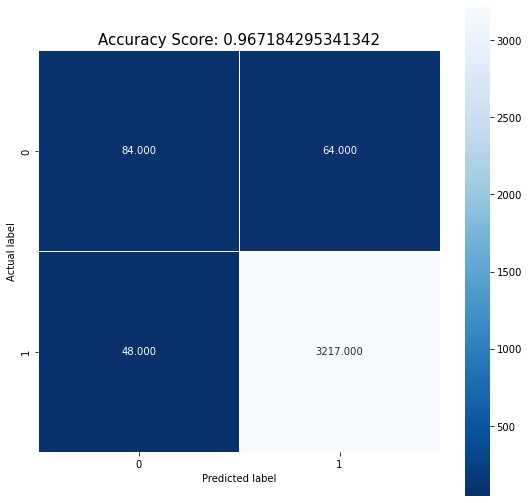

In [68]:
logistic_regression(log_regression_data)

{0: 62, 1: 67}


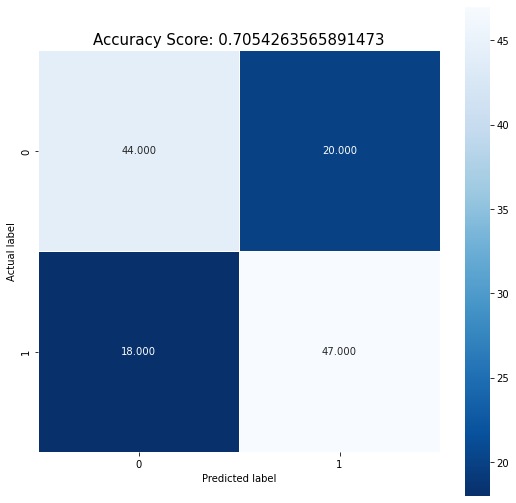

In [69]:
#only uses 1 sample for each unique mutation (uses mean resistance)
logistic_regression(unique_KatG_mutations)

In [70]:
# 5-fold cross-validation after large train test split - test validation split - 30% random - then take 80% of the 70% so c.6000 rows)
# then do a groupby on mutation - now have number of times that mutation has been seen in dataset (will then be 4/500 long)
# train model on that
# then apply it to the 30% 
# plot ROC curves for each one 


In [71]:
CV_training

,Site1_Distance,d_volume,d_MW,d_hydropathy,d_Pi,"('Number of substitutions', 'min')",Depth,MUT_RESISTANCE
12310,4.632459,-27.1,-14.0,-0.1,0.08,1,0.000000,1
858,28.346979,31.1,31.1,-1.9,-0.65,1,3.816212,0
12874,4.632459,-27.1,-14.0,-0.1,0.08,1,0.000000,1
8901,4.632459,-27.1,-14.0,-0.1,0.08,1,0.000000,1
603,31.856112,54.0,16.1,5.4,-0.32,1,1.520111,0
...,...,...,...,...,...,...,...,...
13165,4.632459,-27.1,-14.0,-0.1,0.08,1,0.000000,1
3306,4.632459,-27.1,-14.0,-0.1,0.08,1,0.000000,1
9887,4.632459,-27.1,-14.0,-0.1,0.08,1,0.000000,1
10841,4.632459,-27.1,-14.0,-0.1,0.08,1,0.000000,1


In [72]:
CV_training.corr()['MUT_RESISTANCE'].sort_values(ascending=False)

MUT_RESISTANCE                        1.000000
d_Pi                                  0.071848
d_hydropathy                          0.062781
('Number of substitutions', 'min')   -0.181954
d_MW                                 -0.235433
d_volume                             -0.301539
Depth                                -0.443670
Site1_Distance                       -0.730039
Name: MUT_RESISTANCE, dtype: float64

array([[<AxesSubplot:xlabel='Site1_Distance', ylabel='Site1_Distance'>,
        <AxesSubplot:xlabel='d_volume', ylabel='Site1_Distance'>,
        <AxesSubplot:xlabel='d_MW', ylabel='Site1_Distance'>,
        <AxesSubplot:xlabel='d_hydropathy', ylabel='Site1_Distance'>,
        <AxesSubplot:xlabel='d_Pi', ylabel='Site1_Distance'>,
        <AxesSubplot:xlabel="('Number of substitutions', 'min')", ylabel='Site1_Distance'>,
        <AxesSubplot:xlabel='Depth', ylabel='Site1_Distance'>,
        <AxesSubplot:xlabel='MUT_RESISTANCE', ylabel='Site1_Distance'>],
       [<AxesSubplot:xlabel='Site1_Distance', ylabel='d_volume'>,
        <AxesSubplot:xlabel='d_volume', ylabel='d_volume'>,
        <AxesSubplot:xlabel='d_MW', ylabel='d_volume'>,
        <AxesSubplot:xlabel='d_hydropathy', ylabel='d_volume'>,
        <AxesSubplot:xlabel='d_Pi', ylabel='d_volume'>,
        <AxesSubplot:xlabel="('Number of substitutions', 'min')", ylabel='d_volume'>,
        <AxesSubplot:xlabel='Depth', ylabel='d_volum

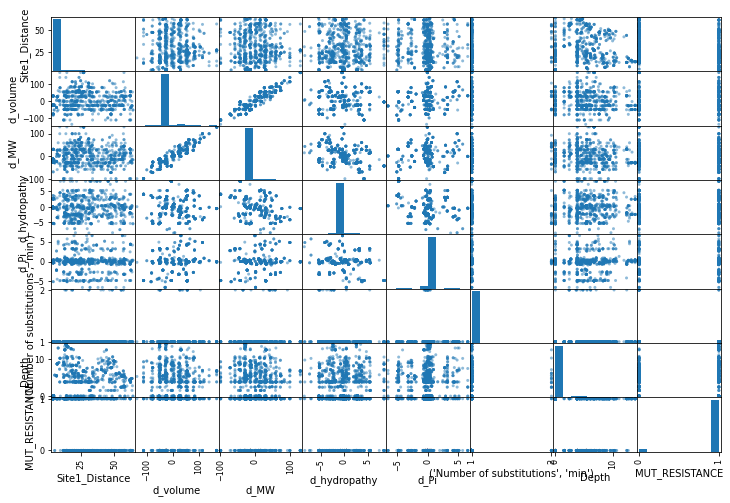

In [73]:
from pandas.plotting import scatter_matrix

scatter_matrix(CV_training, figsize = (12,8))

In [74]:
features_matrix2

,Site1_Distance,d_volume,d_MW,d_hydropathy,d_Pi,"('Number of substitutions', 'min')",Depth
12310,4.632459,-27.1,-14.0,-0.1,0.08,1,0.000000
858,28.346979,31.1,31.1,-1.9,-0.65,1,3.816212
12874,4.632459,-27.1,-14.0,-0.1,0.08,1,0.000000
8901,4.632459,-27.1,-14.0,-0.1,0.08,1,0.000000
603,31.856112,54.0,16.1,5.4,-0.32,1,1.520111
...,...,...,...,...,...,...,...
13165,4.632459,-27.1,-14.0,-0.1,0.08,1,0.000000
3306,4.632459,-27.1,-14.0,-0.1,0.08,1,0.000000
9887,4.632459,-27.1,-14.0,-0.1,0.08,1,0.000000
10841,4.632459,-27.1,-14.0,-0.1,0.08,1,0.000000


In [75]:
label2

12310    1
858      0
12874    1
8901     1
603      0
        ..
13165    1
3306     1
9887     1
10841    1
2774     1
Name: MUT_RESISTANCE, Length: 9556, dtype: int64

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [77]:
lin_reg = LinearRegression()
lin_reg.fit(features_matrix2, label2)

LinearRegression()

In [78]:
predictions2 = lin_reg.predict(features_matrix2)

In [79]:
lin_mse = mean_squared_error(label2, predictions2)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.14379255213638467

In [80]:
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(lin_reg, features_matrix2, label2, scoring = 'neg_mean_squared_error'\
                        , cv = 5)
np.sqrt(-scores)

array([0.14067029, 0.13463696, 0.14790926, 0.15949756, 0.13908155])

In [82]:
mutation_index_s = log_regression_data['MUTATION']
mutation_index_pd = pd.Series(mutation_index_s)
mutation_index = mutation_index_pd.to_frame()

CV_training_and_mutations = CV_training.join(mutation_index, how = 'inner')
CV_training_unique = CV_training_and_mutations.drop_duplicates(subset='MUTATION', keep = 'first')
CV_training_unique.drop(['MUTATION'], axis = 1, inplace = True)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [83]:
CV_training_unique

,Site1_Distance,d_volume,d_MW,d_hydropathy,d_Pi,"('Number of substitutions', 'min')",Depth,MUT_RESISTANCE
12310,4.632459,-27.1,-14.0,-0.1,0.08,1,0.000000,1
858,28.346979,31.1,31.1,-1.9,-0.65,1,3.816212,0
603,31.856112,54.0,16.1,5.4,-0.32,1,1.520111,0
699,15.281882,-31.1,-31.1,1.9,0.65,1,8.103440,1
719,14.410281,23.7,10.0,-0.8,0.62,1,0.000000,0
...,...,...,...,...,...,...,...,...
212,47.511930,-42.1,-22.1,-0.3,-4.82,1,1.520894,0
316,17.878828,-28.5,-14.0,-2.2,-0.03,1,12.715218,0
13646,46.416164,34.2,23.0,0.4,0.23,2,4.394524,0
675,23.280137,25.1,27.0,-2.7,-0.27,1,0.000000,0


In [84]:
# give linear regression a go 

In [85]:
# try removing some of the resistant duplicates

In [86]:
# do another model including non mutation data - just remove distance and depth columns

In [87]:
#all DST measurements with mutation data added where available
genome_training_data = best_measurements_and_genomes.join(katG_mutations_t1, how = 'left')

In [88]:
#gives binary 1 if sample is resistant or 0 if not
genome_training_data['RESISTANCE']=genome_training_data.apply(calculate_resistance_binary,axis=1)

In [89]:
genome_training_data.reset_index(inplace=True)
genome_training_data.set_index('MUTATION',inplace=True)

In [90]:
#just keep chain A data from features table
chain_A_muts = KatG_mutations_df[KatG_mutations_df['Chain'] == 'A']

In [91]:
#only using change in amino acid data as no data on centre of mass for data with no mutations
genome_ML_features = chain_A_muts.drop(chain_A_muts.columns[[0,1,2,4,5,6,11,12,14,15,16]],axis=1)

In [92]:
genome_ML_features.set_index('KatG mutations',inplace=True)

In [93]:
#joins features table to resistance table
genome_ML_data =genome_training_data.join(genome_ML_features, how = 'left')

In [94]:
genome_ML_data.rename(columns = {"('Number of substitutions', 'min')":'MIN_N_SUBS'}, inplace = True)

In [95]:
#replaces NaN with 0s for all of rows in the features table for samples with no mutations 
genome_ML_data['d_volume'] = genome_ML_data['d_volume'].fillna(0)
genome_ML_data['d_MW'] = genome_ML_data['d_MW'].fillna(0)
genome_ML_data['d_hydropathy'] = genome_ML_data['d_hydropathy'].fillna(0)
genome_ML_data['d_Pi'] = genome_ML_data['d_Pi'].fillna(0)
genome_ML_data['MIN_N_SUBS'] = genome_ML_data['MIN_N_SUBS'].fillna(0)

In [96]:
del genome_ML_data['level_0']
del genome_ML_data['index']

In [97]:
genome_ML_data.reset_index(inplace=True)

In [98]:
def logistic_regression_noCoM(data):
    
    features_matrix = data.iloc[:,74:]
    label = data['RESISTANCE']

    x_train, x_test, y_train, y_test = train_test_split(features_matrix,label, test_size = 0.25, random_state=0)
    logisticRegr = LogisticRegression(max_iter=1000)
    logisticRegr.fit(x_train, y_train)

    predictions = logisticRegr.predict(x_test)

    unique, counts = np.unique(predictions, return_counts=True)
    print(dict(zip(unique, counts)))

    score = logisticRegr.score(x_test, y_test)

    cm = metrics.confusion_matrix(y_test, predictions)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);

{0: 7113, 1: 3335}


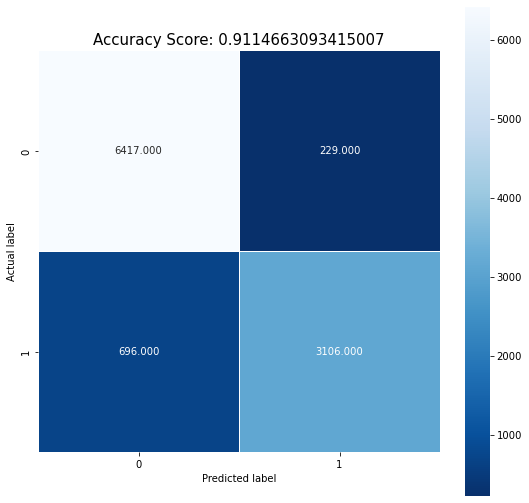

In [99]:
logistic_regression_noCoM(genome_ML_data)

In [100]:
MUTATIONS.join(DST_MEASUREMENTS)['PHENOTYPE'].value_counts()

R    13986
S      907
U      393
I      130
Name: PHENOTYPE, dtype: int64

In [101]:
(DST_MEASUREMENTS)['PHENOTYPE'].value_counts()

S    31419
R    19597
U     1516
I      798
Name: PHENOTYPE, dtype: int64

In [102]:
#random forest was v good as it could put a greater emphasis on structural data - had a higher
#specificity for distance

In [103]:
#can also base it off MIC instead of binary - can then split the data after this 

In [104]:
# can try other hydropathy scales - Whimley and White (more modern paper - 1996): 
# Experimentally determined hydrophobicity scale for proteins at membrane interfaces
# Nature Structural Biology

In [105]:
# there are other genes which would be causing the mutations 

In [106]:
# consider adding a middle category - can then throw away - but leaves big difference between R and S

In [107]:
# if detecting R you want high specificity - dont want to treat someone who's R as S

INH    53811
Name: DRUG, dtype: int64

In [124]:
OTHER_PHENOTYPES['SOURCE'].value_counts()

CLIRES      6215
NEJM2018    6179
PHE         4198
LID2015     2246
WHO         2068
MUMBAI      1442
TORCH        144
Name: SOURCE, dtype: int64

In [128]:
MIC_data = DST_MEASUREMENTS[DST_MEASUREMENTS['SOURCE'] == 'CRyPTIC']

In [148]:
MIC_data['METHOD_MIC'].value_counts().sort_index()

0.05       4327
0.1         254
0.2         465
0.4         306
0.8         372
1.6        1714
12.8        308
3.2        1231
6.4         405
<=0.025    3381
>1.6       1787
>12.8       447
Name: METHOD_MIC, dtype: int64

In [132]:
MIC_data['PHENOTYPE'].value_counts()

S    7962
R    6264
I     771
Name: PHENOTYPE, dtype: int64

In [142]:
R_data_chart = log_regression_data[log_regression_data['RESISTANCE'] == 1]
R_data_chart['MUTATION'].value_counts().head(6)

S315T    11817
S315N      121
V473L       18
W328L       16
W191R       15
Q127P       14
Name: MUTATION, dtype: int64